# Results Visualizer

Scans all the processed files and outputs the results based on the scenario.

In [27]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
import csv
import statistics

# Scenarios Settings
participants = [1, 2, 4, 5, 6]
participants_no = 6
experiments_initials = ['R', 'S', 'U']
experiments_names = ['Rational', 'StringUtil', 'UtilObject']
header = ['First_Ratio', 'Second_Ratio']

participants_label = ["P1", "P2", "P4", "P5", "P6"]

In [28]:
# 1. Load the dato into dataframe
def read_file(file_name):
    my_absolute_dirpath = os.path.abspath(os.path.dirname(file_name))
    file_path = my_absolute_dirpath+"\\aResults\\Percentage\\"+file_name
    df = pd.read_csv(file_path, sep=",")
    return df

In [29]:
# 2. Aggregates the results based on the experiment
def get_aggregated_data():
    
    # Defining return list
    aggregated_dfs = []
    
    # Iterates through the experiments
    for letter in experiments_initials:
        
        letter_df = pd.DataFrame(columns=header)
        
        # Iterates through the participants
        for i in participants:
            
            # Reads file
            df = read_file('results_'+letter+'_0'+str(i)+'.csv')
            letter_df = letter_df.append(df)
            
        # Defining the index of the df
        index = participants
        letter_df['Participant'] = index
        letter_df = letter_df.set_index('Participant')
        
        # Appending df of the letter to return list
        aggregated_dfs.append(letter_df)
            
    return aggregated_dfs

In [30]:
def print_dfs(df_r, df_s, df_u):
    print(df_r)
    print(df_s)
    print(df_u)

#### Old Graphs plots

In [31]:
# Plot data (experiment x ratio)
def visualize_experiment_ratio(df_r, df_s, df_u):
    
    # Plotting the Rational experiment data-------------
    plt.figure(figsize=(15,4))

    # -- Rational - First_Ratio
    plt.subplot(1,2,1)
    plt.scatter(df_r.index, df_r.First_Ratio)
    plt.xlabel('Rational - First Ratio')

    # -- Rational - Second_Ratio
    plt.subplot(1,2,2)
    plt.scatter(df_r.index, df_r.Second_Ratio)
    plt.xlabel('Rational - Second Ratio')

    # -- Final settings
    plt.subplots_adjust(wspace=.8)
    plt.show()


    # Plotting the StringUtil experiment data-------------
    plt.figure(figsize=(15,4))

    # -- StringUtil - First_Ratio
    plt.subplot(1,3,1)
    plt.scatter(df_s.index, df_s.First_Ratio)
    plt.xlabel('StringUtil - First Ratio')

    # -- StringUtil - Second_Ratio
    plt.subplot(1,3,2)
    plt.scatter(df_s.index, df_s.Second_Ratio)
    plt.xlabel('StringUtil - Second Ratio')

    # -- Final settings
    plt.subplots_adjust(wspace=.8)
    plt.show()

    
    # Plotting the UtilObject experiment data-------------
    plt.figure(figsize=(15,4))
    
    # -- UtilObject - First_Ratio
    plt.subplot(1,2,1)
    plt.scatter(df_u.index, df_u.First_Ratio)
    plt.xlabel('UtilObject - First Ratio')

    # -- UtilObject - Second_Ratio
    plt.subplot(1,2,2)
    plt.scatter(df_u.index, df_u.Second_Ratio)
    plt.xlabel('UtilObject - Second Ratio')

    # -- Final settings
    plt.subplots_adjust(wspace=.8)
    plt.show()
    
    
# Plot data (participant x ratio)
def visualize_participants(df_r, df_s, df_u):
    
    # Plotting data per participant
    for i in participants:
        
        # Retrieving data per participant
        r = df_r.loc[i]
        s = df_s.loc[i]
        u = df_u.loc[i]
        
        # Defining figure
        plt.figure(figsize=(15,4))
        
        # First_Ratio
        plt.subplot(1, 2, 1)
        plt.ylabel("Participant "+str(i))
        plt.plot(['r', 's', 'u'], [r.First_Ratio, s.First_Ratio, u.First_Ratio], 'o-b')
        plt.xlabel('First Ratio wrt scenario')
        
        # Second Ratio
        plt.subplot(1, 2, 2)
        plt.plot(['r', 's', 'u'], [r.Second_Ratio, s.Second_Ratio, u.Second_Ratio], 'o-b')
        plt.xlabel('Second Ratio wrt scenario')

        # Final settings
        plt.subplots_adjust(wspace=.8)
        plt.show()

### Main

In [32]:
# Getting the dataframes based on the experiment
[df_r, df_s, df_u] = get_aggregated_data()

# Output results
print_dfs(df_r, df_s, df_u)

# Old Graphs
#visualize_experiment_ratio(df_r, df_s, df_u)
#visualize_participants(df_r, df_s, df_u)

             First_Ratio  First_Ratio_Baseline  Second_Ratio  \
Participant                                                    
1              -0.001276              0.514388      0.013933   
2               0.024207              0.464923     -0.007152   
4               0.003383              0.462643      0.011343   
5              -0.002146              0.513117     -0.005488   
6               0.028193              0.463727     -0.042609   

             Second_Ratio_Baseline  
Participant                         
1                         0.454609  
2                         0.488563  
4                         0.483144  
5                         0.474566  
6                         0.524241  
             First_Ratio  First_Ratio_Baseline  Second_Ratio  \
Participant                                                    
1              -0.004298              0.494082      0.020703   
2              -0.011945              0.504601      0.021582   
4               0.004161            

### Overview:
- row 1:
    - Mean per participant of first_ratio
    - Mean per participant of second_ratio
- row 2 - First_ratio:
    - "R1 w/o comments" First_ratio divided by Rational (1 and 4), StringUtil (3 and 6), UtilObject (2 and 5)
    - "R1 with comments" First_ratio divided by Rational (2 and 5), StringUtil (1 and 4), UtilObject (3 and 6)
    - "R1 with TD/UI" First_ratio divided by Rational (3 and 6), StringUtil (2 and 5), UtilObject (1 and 4)
- row 3 - Second_ratio:
    - "R1 w/o comments" Second_ratio divided by Rational (1 and 4), StringUtil (3 and 6), UtilObject (2 and 5)
    - "R1 with comments" Second_ratio divided by Rational (2 and 5), StringUtil (1 and 4), UtilObject (3 and 6)
    - "R1 with TD/UI" Second_ratio divided by Rational (3 and 6), StringUtil (2 and 5), UtilObject (1 and 4)

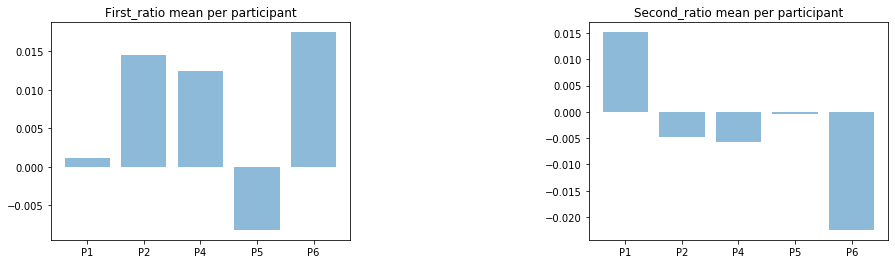

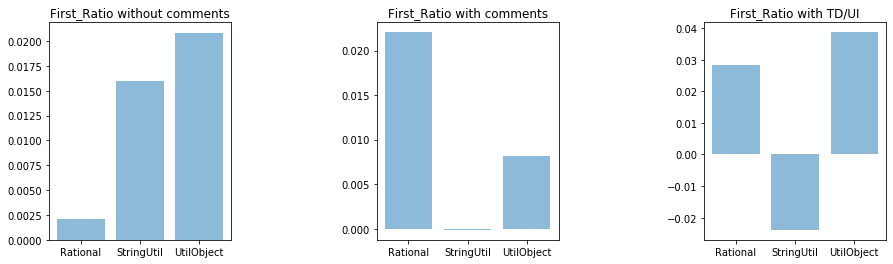

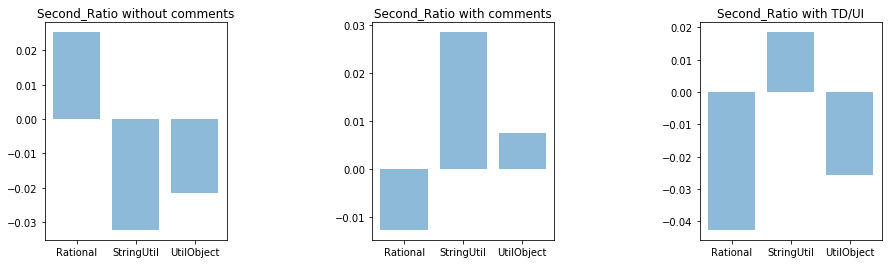

In [33]:
# Method for row 1
def visualize_overview_means (df_r, df_s, df_u):
    
    # Defining first variables
    all_first_ratio_means = []
    all_second_ratio_means = []
    
    # Iterate all the participants
    for i in participants:
        
        # Calculation of the first ratio mean per participant
        first_ratio_mean = statistics.mean([df_r.loc[i]['First_Ratio'], df_s.loc[i]['First_Ratio'], df_u.loc[i]['First_Ratio']])
        all_first_ratio_means.append(first_ratio_mean)
        
        # Calculation of the second ratio mean per participant
        second_ratio_mean = statistics.mean([df_r.loc[i]['Second_Ratio'], df_s.loc[i]['Second_Ratio'], df_u.loc[i]['Second_Ratio']])
        all_second_ratio_means.append(second_ratio_mean)       
        
    # Plotting the overview graphs-------------
    plt.figure(figsize=(15,4))
    x = participants_label

    # -- First_Ratio
    plt.subplot(1, 2, 1)
    plt.bar(x, all_first_ratio_means, align='center', alpha=0.5)
    plt.xticks(x, participants_label)
    plt.title('First_ratio mean per participant')

    # -- Second_Ratio
    plt.subplot(1, 2, 2)
    plt.bar(x, all_second_ratio_means, align='center', alpha=0.5)
    plt.xticks(x, participants_label)
    plt.title('Second_ratio mean per participant')

    # -- Final settings
    plt.subplots_adjust(wspace=.8)
    plt.show()
    

# Method for row 2 and 3
def visualize_overview_ratios (df_r, df_s, df_u):
    
    # Preparing plot for both ratios
    for ratio in ['First_Ratio', 'Second_Ratio']:
    
        # Preparing data for "without comments" plot
        without_comments = []
        without_comments.append(statistics.mean([df_r.loc[1][ratio] + df_r.loc[4][ratio]]))
        without_comments.append(statistics.mean([df_s.loc[6][ratio]]))
        without_comments.append(statistics.mean([df_u.loc[2][ratio] + df_u.loc[5][ratio]]))

        # Preparing data for "with comments" plot
        with_comments = []
        with_comments.append(statistics.mean([df_r.loc[2][ratio] + df_r.loc[5][ratio]]))
        with_comments.append(statistics.mean([df_s.loc[1][ratio] + df_s.loc[4][ratio]]))
        with_comments.append(statistics.mean([df_u.loc[6][ratio]]))

        # Preparing data for "with TD/UI" plot
        with_td_ui = []
        with_td_ui.append(statistics.mean([df_r.loc[6][ratio]]))
        with_td_ui.append(statistics.mean([df_s.loc[2][ratio] + df_s.loc[5][ratio]]))
        with_td_ui.append(statistics.mean([df_u.loc[1][ratio] + df_u.loc[4][ratio]]))


        # Plotting the overview graphs-------------
        plt.figure(figsize=(15,4))
        x = experiments_names

        # -- Without Comments
        plt.subplot(1, 3, 1)
        plt.bar(x, without_comments, align='center', alpha=0.5)
        plt.title(ratio+' without comments')

        # -- With Comments
        plt.subplot(1, 3, 2)
        plt.bar(x, with_comments, align='center', alpha=0.5)
        plt.title(ratio+' with comments')

        # -- With TD/UI
        plt.subplot(1, 3, 3)
        plt.bar(x, with_td_ui, align='center', alpha=0.5)
        plt.title(ratio+' with TD/UI')

        # -- Final settings
        plt.subplots_adjust(wspace=.8)
        plt.show()
        
visualize_overview_means(df_r, df_s, df_u)
visualize_overview_ratios(df_r, df_s, df_u)

### Detailed plots visualizer

In [34]:
def visualize_plots (title, df, participants):
    
    # Initial plot settings
    plt.figure(figsize=(15,4))
    j = 1
    
    # Iterating the two ratios
    for ratio in ['First_Ratio', 'Second_Ratio']:
        
        # Indicatign plot position
        plt.subplot(1, 2, j)
        
        # Defining the values to be inserted
        labels = ["P"+str(i) for i in participants]
        ratio_values = [df.loc[i][ratio] for i in participants]
        baseline_values = [df.loc[i][ratio+'_Baseline'] for i in participants]

        # Defining label location and width
        x = np.arange(len(labels))
        width = 0.35

        # Plotting data
        plt.bar(x - width/2, ratio_values, width, label=ratio)
        plt.bar(x + width/2, baseline_values, width, label='Baseline')
        plt.title(ratio)
        plt.ylabel(title)

        j = j + 1

    # Final settings
    plt.subplots_adjust(wspace=.8)
    plt.show()

### Detailed Plots

#### First Graphs - Rational
- row 1 "Rational w/o comments":
    - First_ratio representation per participant 1 and 4 +baseline
    - Second_ratio representation per participant 1 and 4 +baseline
- row 2 "Rational with comments":
    - First_ratio representation per participant 2 and 5 +baseline
    - Second_ratio representation per participant 2 and 5 +baseline
- row 3 "Rational with TD/UI":
    - First_ratio representation per participant 3 and 6 +baseline
    - Second_ratio representation per participant 3 and 6 +baseline
    
#### Second Graphs - StringUtil
- row 1 "StringUtil w/o comments":
    - First_ratio representation per participant 3 and 6 +baseline
    - Second_ratio representation per participant 3 and 6 +baseline
- row 2 "StringUtil with comments":
    - First_ratio representation per participant 1 and 4 +baseline
    - Second_ratio representation per participant 1 and 4 +baseline
- row 3 "StringUtil with TD/UI":
    - First_ratio representation per participant 2 and 5 +baseline
    - Second_ratio representation per participant 2 and 5 +baseline
    
#### Third Graphs - UtilObject
- row 1 "UtilObject w/o comments":
    - First_ratio representation per participant 2 and 5 +baseline
    - Second_ratio representation per participant 2 and 5 +baseline
- row 2 "UtilObject with comments":
    - First_ratio representation per participant 3 and 6 +baseline
    - Second_ratio representation per participant 3 and 6 +baseline
- row 3 "UtilObject with TD/UI":
    - First_ratio representation per participant 1 and 4 +baseline
    - Second_ratio representation per participant 1 and 4 +baseline

Legend
Orange: baseline
Blue: ratio
-----------------------------------------------------Rational plots-----------------------------------------------------


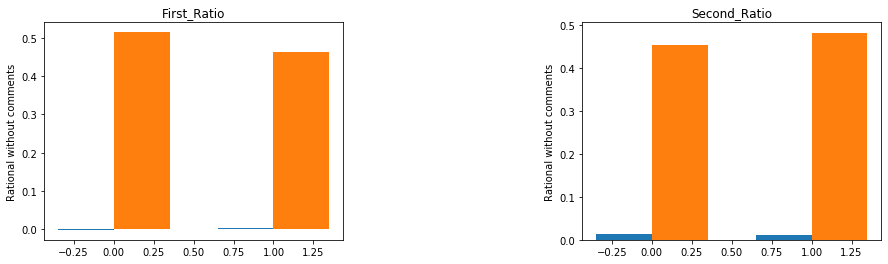

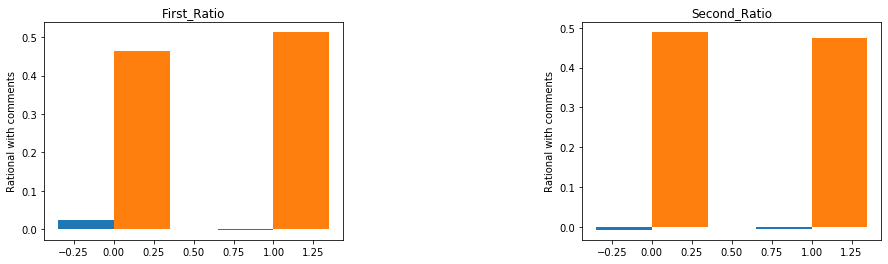

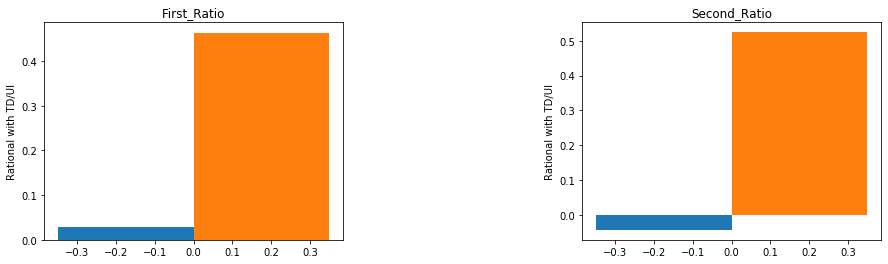

-----------------------------------------------------StringUtil plots-----------------------------------------------------


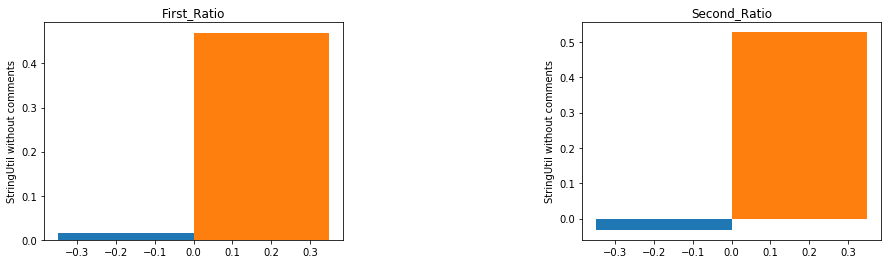

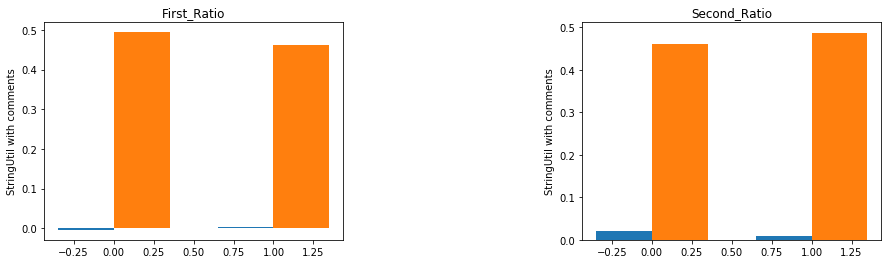

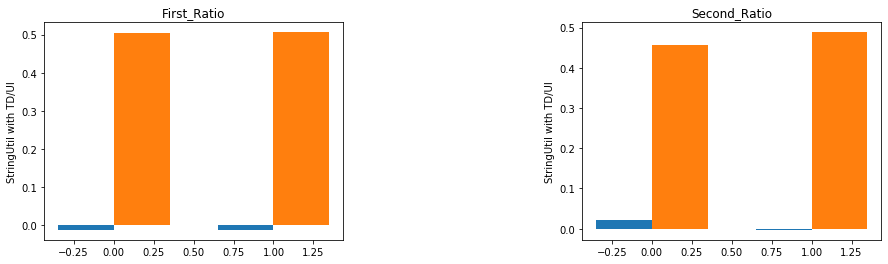

-----------------------------------------------------UtilObject plots-----------------------------------------------------


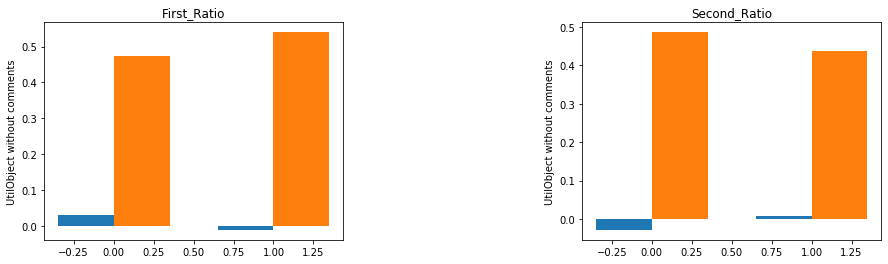

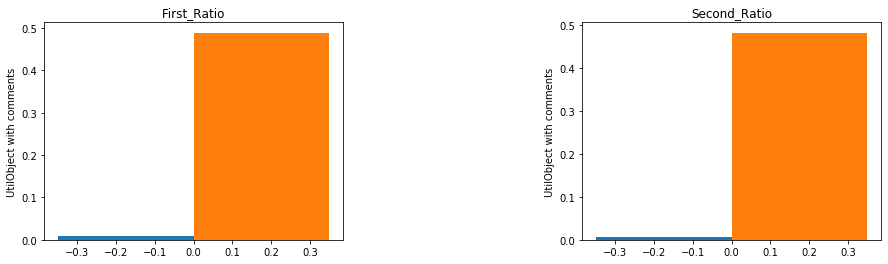

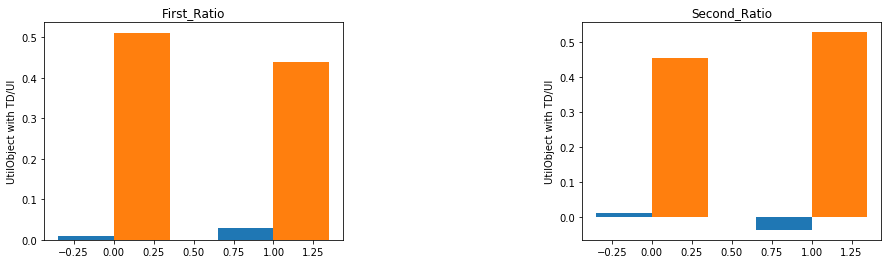

In [35]:
def visualize_detailed_plots (df_r, df_s, df_u):
    
    # Printing the legend
    print("Legend")
    print("Orange: baseline")
    print("Blue: ratio")
    
    # Preparing plot for Rational experiment
    print("-----------------------------------------------------Rational plots-----------------------------------------------------")
    visualize_plots('Rational without comments', df_r, [1, 4])
    visualize_plots('Rational with comments', df_r, [2, 5])
    visualize_plots('Rational with TD/UI', df_r, [6])
    
    # Preparing plot for StringUtil experiment
    print("-----------------------------------------------------StringUtil plots-----------------------------------------------------")
    visualize_plots('StringUtil without comments', df_s, [6])
    visualize_plots('StringUtil with comments', df_s, [1, 4])
    visualize_plots('StringUtil with TD/UI', df_s, [2, 5])
    
    # Preparing plot for UtilObject experiment
    print("-----------------------------------------------------UtilObject plots-----------------------------------------------------")
    visualize_plots('UtilObject without comments', df_u, [2, 5])
    visualize_plots('UtilObject with comments', df_u, [6])
    visualize_plots('UtilObject with TD/UI', df_u, [1, 4])

visualize_detailed_plots(df_r, df_s, df_u)